# Regression lineaire multiple avec Numpy

# Librairies utiles

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Dataset

Génération de données aléatoires avec une tendance linèaire avec make_regression: On a un dataset $(x,y)$ composé de 100 exemples et deux variables $x$(deux features).

Ensuite, visualisation selon la première composante $(x^1)$

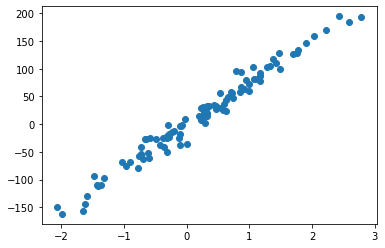

In [39]:
x, y = make_regression(n_features = 2, n_samples=100, noise=10)

# Affiche du nuage de points
plt.scatter(x[:,1], y)

Vérification des dimensions de $x$ et $y$. 
> on constate que $y$ n'a pas de dimension (100 ,2) comme $x$

In [40]:
#verifier les dimensions de x et y
print(x.shape)
print(y.shape)

(100, 2)
(100,)


Correction du problèle de dimension avec la fonction **np.reshape**

Ensuite, Création de la matrice X qui contient la colonne de Biais. Pour cela, on colle l'un contre l'autre le vecteur x et un vecteur de 1 (avec np.ones) de dimension égale a celle de x

In [41]:
# redimensionner y
y = y.reshape(y.shape[0],1)

# transformation de x sous forme matricielle
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)
print(X[:5])

(100, 3)
[[ 0.34279612 -2.06675801  1.        ]
 [-0.23589346 -1.98196181  1.        ]
 [-0.02040783 -0.28196426  1.        ]
 [-0.09419069 -0.72745159  1.        ]
 [-1.59128879  0.29195693  1.        ]]


Finalement, création d'un vecteur parametre $\theta$, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (3, 1). Si on désire toujours reproduire le meme vecteur $\theta$, on utilise comme avant np.random.seed(0).

In [42]:
# initialisation de theta
# vecteur de dim 2 lignes 1 colonne
np.random.seed(0)
theta = np.random.randn(3,1)
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798]])

# Le Modele Linèaire

On implemente le modele de $F = X.\theta$

In [43]:
def model(X, theta):
    return X.dot(theta)

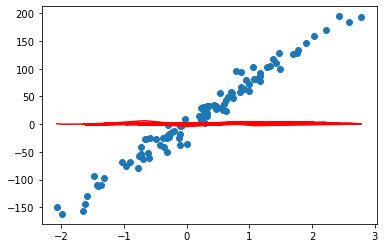

In [45]:
# representation des prediction du modele dans un graphe
plt.scatter(x[:,1],y)
plt.plot(x[:,1], model(X, theta), c="red")

# Cost function : Erreur quadratique moyenne

On mesure les erreurs du modele sur le dataset X, y en implementant la fonction **MSE**:
$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

In [46]:
def cost_function(X, y, theta):
    m = len(y) # m est le nombre de ligne du dataset
    return 1/(2*m)*np.sum((model(X, theta) - y)**2)

In [47]:
cost_function(X, y, theta)

3201.3710715254233

# Gradients
Formule de la descente de gradient pour la **MSE** :
$ \frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}.X^T.(X.\theta - y)$ 

In [48]:
def gradient(X, y, theta):
    m = len(y)
    return (1/m)*X.T.dot(model(X, theta) - y)

# Descente de gradient
Formule du de la decente de gradient :
$\theta = \theta - \alpha \frac{\partial J(\theta)}{\theta}$

In [49]:
def gradient_descent(X, y, theta, learning_rate, n_iteration):
    #tableau de n_iterations entrées 
    cost_history = np.zeros(n_iteration) #contenant la liste des erreurs du modele
    
    for i in range(n_iteration):
        theta = theta - learning_rate*gradient(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Entrainement du modèle

On defini le **nombre d'iterations** ainsi que le **pas d'apprentissage** $\alpha$

In [50]:
learning_rate=0.01
n_iteration=1000

# Le theta finale ainsi que les erreurs d'apprentissage du modele sont stockés respectivement 
# dans les variable theta_finale et cost_history
theta_finale, cost_history = gradient_descent(X, y, theta, learning_rate, n_iteration)

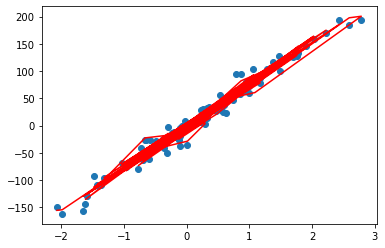

In [51]:
# vecteur prédictions qui contient les prédictions de notre modele final
prediction =  model(X, theta_finale)

# affichage des resultats(en rouge) par rapport à notre dataset(en bleu)
plt.scatter(x[:,1], y)
plt.plot(x[:,1], prediction, c="r")

# Courbe d'apprentissage
Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Ce qui est bien le cas ici.

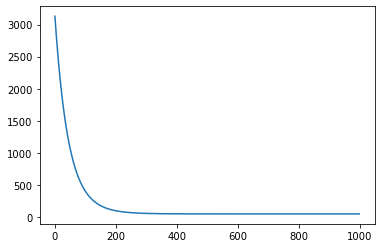

In [52]:
# on va tracer la courbe d'apprentissage sur 1000 point
plt.plot(range(1000), cost_history)

on constate qu'au bout de la 300 ieme iteration la fonction cout reste linéaire. On aurais pu arreter l'entrainement après 300 itérations pour economiser de l'energies à la machine.

# Evaluation des performance du modèle
>Pour évaluer la réelle performance du modele avec une métrique populaire on peut utiliser le **coefficient de détermination** $R^2$. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele.

In [53]:
def coef(y, pred):
    # le residus de la somme des carrées
    d = ((y - prediction)**2).sum()
    # la sommme total des carrées
    n = ((y - y.mean())**2).sum()
    return 1 - d/n

In [54]:
# le coefficient de determination
coef(y, prediction)

0.9856048633110349

<IPython.core.display.Javascript object>


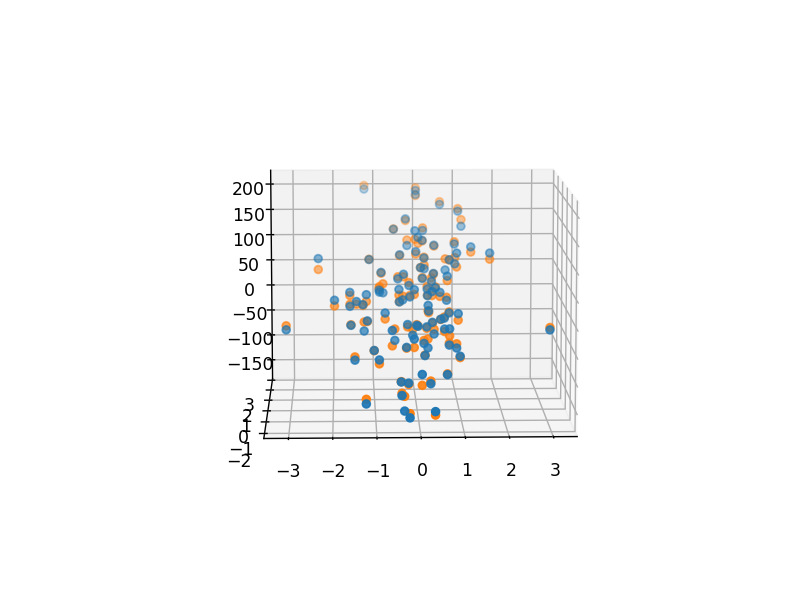

In [55]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], prediction)